In [11]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(api_key)

ca845831c038d332e0590da4b4945b87


In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [4]:
# Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
# OpenWeatherMap API Key
api_key = "ca845831c038d332e0590da4b4945b87"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []


# Create counters
record_count = 1
set_count = 1
# cities = ['busselton']

for i, city in enumerate(cities):
#print(city)
    city_url = url + "&q=" + city
    try:
        
        city_weather = requests.get(city_url).json()
#         print(city_weather)

        latitude = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        temp = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        city_data.append({"City": city,
                          "Latitude": latitude,
                          "Longitude": longitude,
                          "Temp": temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
    except: 
#         print("city not found.  Skipping...", city)
        pass
    
    

In [7]:
len(city_data)

557

In [12]:
city_df = pd.DataFrame(city_data)

lat = city_df["Latitude"]
long = city_df["Longitude"]
temp = city_df["Temp"]
humid = city_df["Humidity"]
cloud = city_df["Cloudiness"]
wind = city_df["Wind Speed"]

city_df.to_csv(output_data_file, index_label="City_ID")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temp,Wind Speed
0,puerto ayora,40,EC,1580518661,74,-0.74,-90.35,79.21,16.11
1,bambous virieux,40,MU,1580518945,83,-20.34,57.76,76.96,6.93
2,vaini,75,TO,1580518945,83,-21.20,-175.20,84.20,11.41
3,guerrero negro,0,MX,1580518945,28,27.98,-114.06,72.21,8.86
4,dingle,98,PH,1580518945,85,11.00,122.67,73.17,12.15


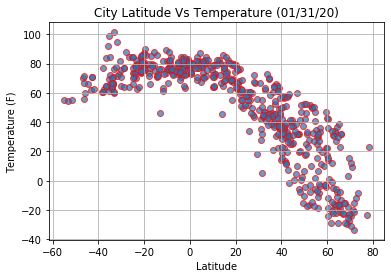

In [22]:
plt.scatter(lat,
            temp,
           marker="o",
           alpha=0.7,
           linewidths=1,
           edgecolor="red")

plt.title("City Latitude Vs Temperature (%s)" % time.strftime ("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Graph1.png")

plt.show()

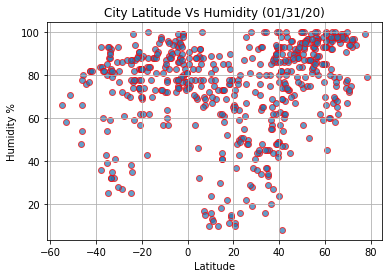

In [24]:
plt.scatter(lat,
            humid,
           marker="o",
           alpha=0.7,
           linewidths=1,
           edgecolor="red")

plt.title("City Latitude Vs Humidity (%s)" % time.strftime ("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Graph2.png")

plt.show()

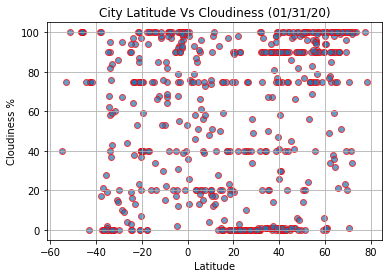

In [25]:
plt.scatter(lat,
            cloud,
           marker="o",
           alpha=0.7,
           linewidths=1,
           edgecolor="red")

plt.title("City Latitude Vs Cloudiness (%s)" % time.strftime ("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Graph3.png")

plt.show()

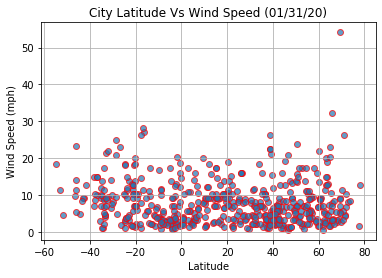

In [26]:
plt.scatter(lat,
            wind,
           marker="o",
           alpha=0.7,
           linewidths=1,
           edgecolor="red")

plt.title("City Latitude Vs Wind Speed (%s)" % time.strftime ("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Graph4.png")

plt.show()